In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create custom dataset with make_blobs and plot it

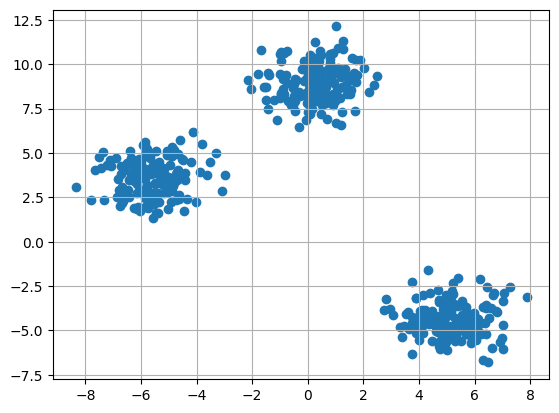

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])


clustering = AgglomerativeClustering(n_clusters=2).fit(X)

print(clustering.labels_)

[1 1 1 0 0 0]


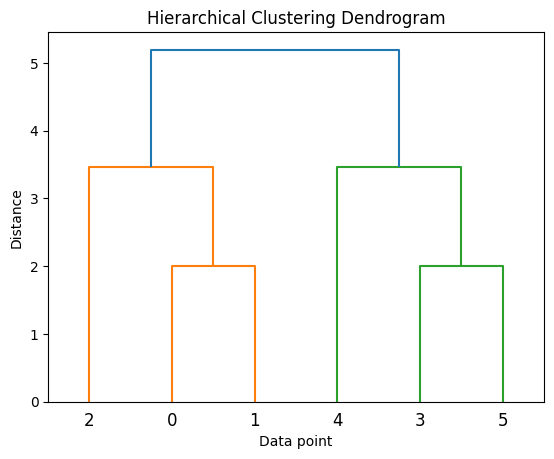

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

Z = linkage(X, 'ward') # Ward Distance

dendrogram(Z) #plotting the dendogram

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()

# Iris dataset Practice


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, adjusted_rand_score,normalized_mutual_info_score


In [ ]:
# loading dataset
iris = load_iris()


In [ ]:
X = pd.DataFrame(iris.data,columns = iris.feature_names)
y= pd.Series(iris.target, name = 'target')

In [ ]:
feature_name = X.columns
target_name = iris.target_names

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
try:
  from scipy.cluster.hierarchy import dendrogram, linkage
  Scipy_available = True
except:
  Scipy_available = False

In [ ]:
# step 1: standardize Features by using standard scaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# step 2: define the number of clusters (k)

n_clusters = 3 # because in iris dataset we know that we have three categories.
# we choose the value of k randomly

In [ ]:
# defining the K mean clustering

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)

In [ ]:
kmeans_labels = kmeans.fit_predict(X_scaled)  # fit model and get the cluster assignments

In [ ]:
# model evaluation
# measure the similarity of data with in the cluster compared to the other cluster

kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
kmeans_sil

np.float64(0.4798814508199817)

In [ ]:
# measure the similarity between the true label and the predicted label.
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
kmeans_ari

0.432804702527474

In [ ]:
# it measures how much information about the true labels is gained by knowing the predicted clusters.

kmeans_nmi = normalized_mutual_info_score(y, kmeans_labels)
kmeans_nmi

np.float64(0.5895674488004073)

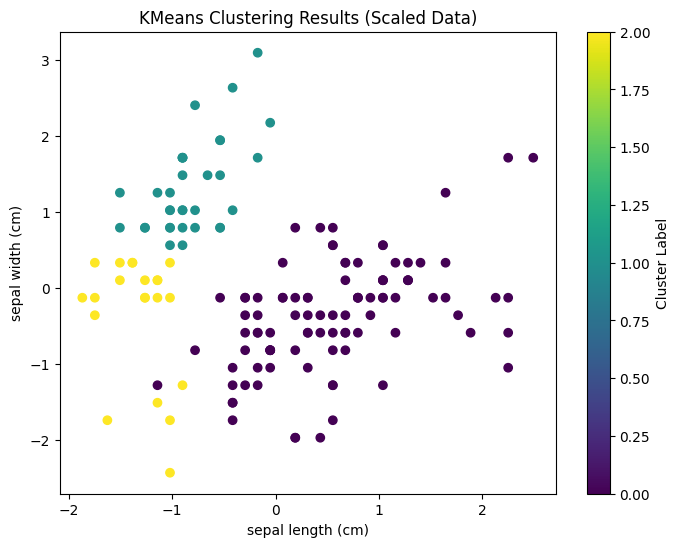

In [ ]:
# Visualize the KMeans clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering Results (Scaled Data)')
plt.xlabel(feature_name[0])
plt.ylabel(feature_name[1])
plt.colorbar(label='Cluster Label')
plt.show()

# Agglomerative (Hierarchical) Clustering

**bottom up approach**

**Agglomerative starts with each point as its own cluster and merges the two closest clusters iteratively.**

In [ ]:
agg = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward') # 'ward' linkage minimizes variance of merged clusters; it implicitly uses Euclidean distance.
agg_labels = agg.fit_predict(X_scaled)

In [ ]:
# Evaluation Matrics for the Agglomerative Clustering

agg_sil = silhouette_score(X_scaled, agg_labels)
agg_ari = adjusted_rand_score(y, agg_labels)
agg_nmi = normalized_mutual_info_score(y, agg_labels)

print(f"silhouette_score is: {agg_sil}, Adjusted_rand_score is: {agg_ari}, normalized_mutual_info_score is: {agg_nmi}")

silhouette_score is: 0.4466890410285909, Adjusted_rand_score is: 0.6153229932145449, normalized_mutual_info_score is: 0.6754701853436886


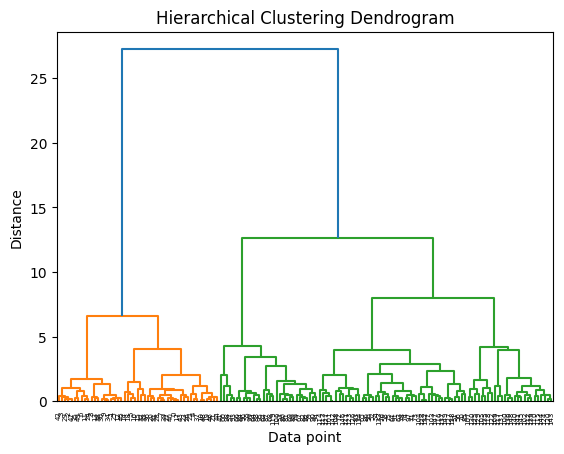

In [ ]:
# Visualize the dendrogram
if Scipy_available:
  Z = linkage(X_scaled, 'ward') # Ward Distance
  dendrogram(Z) #plotting the dendogram
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Data point')
  plt.ylabel('Distance')
  plt.show()
else:
  print("Scipy not available, cannot plot dendrogram.")

# Principal Component Analysis PCA
**used for the dimentionality reduction and it is a preprocessing technique in which it automatically select the most informative and relavent feature for the model training.**

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
colab_dataset_path = '/content/drive/MyDrive/Digit recognition /train.csv'

df = pd.read_csv(colab_dataset_path)
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

**The size of the image is 28*28 so that's why we have 785 columns one column countain the label of crossponding image and other having the pixels of the image.**

/tmp/ipython-input-36-1557706616.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Label: {image_data[0]}")


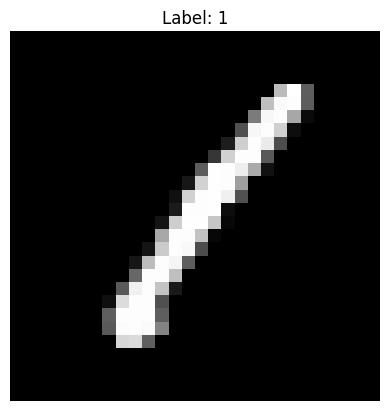

In [ ]:
# Select a single image row from the DataFrame (e.g., the first row)
image_data = df.iloc[0]

# The first column is the label, so we need to select the pixel data from the second column onwards
# Reshape the pixel data into a 28x28 image
image = image_data[1:].values.reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {image_data[0]}")
plt.axis('off') # Hide the axes
plt.show()

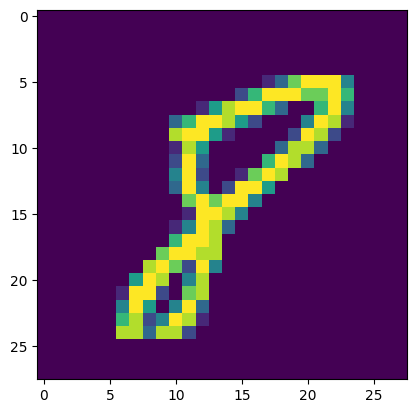

In [ ]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# it take too much time for prediction bcz of too much dimensions
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

21.288729667663574


**We can see that it take 21 sec for prediction so here come the need of PCA which reduce the dimensions of the dataset.**

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9648809523809524

# PCA Implementation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components = 100) # basically we choose how many components we want for none it take all the columns
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# applying the PCA for dimentionality reduction

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape

(33600, 100)

**You can see that it only select the 100 columns from the whole dataset.**

In [ ]:
# model training
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
start = time.time()
y_pred_trf = knn.predict(X_test_trf)
print(time.time()-start)


5.748079299926758


**Now you can see that it take less time during prediction.**

In [ ]:
accuracy_score(y_test, y_pred_trf)

0.9544047619047619

In [ ]:
# now let me loop through 1 to 784 dimensions for checking the best accracy on which value of pca component

for i in range(1,785):
  pca = PCA(n_components = i)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)

  knn.fit(X_train_trf,y_train)
  y_pred_trf = knn.predict(X_test_trf)

  print(f"Accuracy for {i} components is: {accuracy_score(y_test, y_pred_trf)}")

Accuracy for 1 components is: 0.2580952380952381
Accuracy for 2 components is: 0.3236904761904762
Accuracy for 3 components is: 0.5104761904761905
Accuracy for 4 components is: 0.6663095238095238
Accuracy for 5 components is: 0.7378571428571429
Accuracy for 6 components is: 0.8227380952380953
Accuracy for 7 components is: 0.8436904761904762
Accuracy for 8 components is: 0.8721428571428571
Accuracy for 9 components is: 0.886547619047619
Accuracy for 10 components is: 0.9055952380952381
Accuracy for 11 components is: 0.9116666666666666
Accuracy for 12 components is: 0.9184523809523809
Accuracy for 13 components is: 0.9276190476190476
Accuracy for 14 components is: 0.9351190476190476
Accuracy for 15 components is: 0.9384523809523809
Accuracy for 16 components is: 0.9379761904761905
Accuracy for 17 components is: 0.9407142857142857
Accuracy for 18 components is: 0.94
Accuracy for 19 components is: 0.9425
Accuracy for 20 components is: 0.9442857142857143
Accuracy for 21 components is: 0.943

KeyboardInterrupt: 

In [ ]:
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [ ]:
# 2d graph plot

import plotly.express as px
y_train = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 color = y_train,
                 )
fig.show()

In [ ]:
# for 3d graph plot

pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
# 3d visualization

y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x = X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 z = X_train_trf[:,2],
                 color = y_train_trf)

fig.update_layout(margin=dict(l=20, r=20, b=20, t=20))
fig.show()

In [ ]:
# eigen values of the top three compnents
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])